In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
root_dir = "/content/drive/MyDrive/disastertweet"
data_dir = "/content/drive/MyDrive/disastertweet/data"


In [4]:
data = pd.read_csv(data_dir + "/train.csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data_test = pd.read_csv(data_dir + "/test.csv")
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
data['text_len'] = data['text'].apply(lambda x: len(x.split(' ')))
data.head(10)

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,10


## **EDA**

### Class count

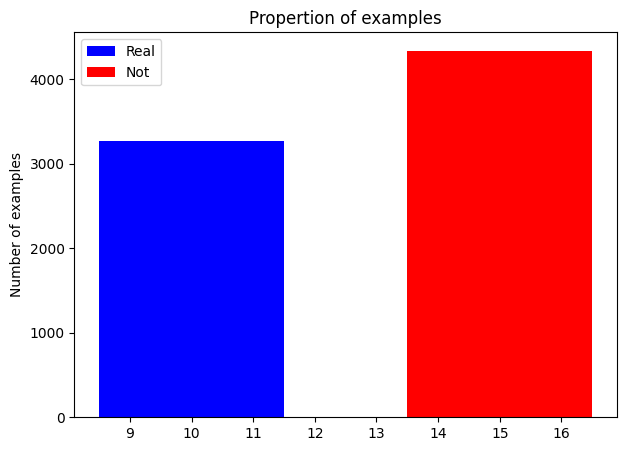

Number of 1:  3271
Number of 0:  4342


In [ ]:
num_of_real = data[data['target'] == 1].shape[0]
num_of_fake = data[data['target'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,num_of_real,3, label="Real", color='blue')
plt.bar(15,num_of_fake,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()
print("Number of 1: ", num_of_real)
print("Number of 0: ", num_of_fake)

### Text length (word) count

In [ ]:
pos_df = data[data['target'] == 1]
neg_df = data[data['target'] == 0]

In [ ]:
def plot_length_count(data, label):
    plt.figure(figsize=(20 ,10))
    sns.countplot(data = data, x = data['text_len'])
    plt.title("Count plot of length text of class {}".format(label))
    plt.show()

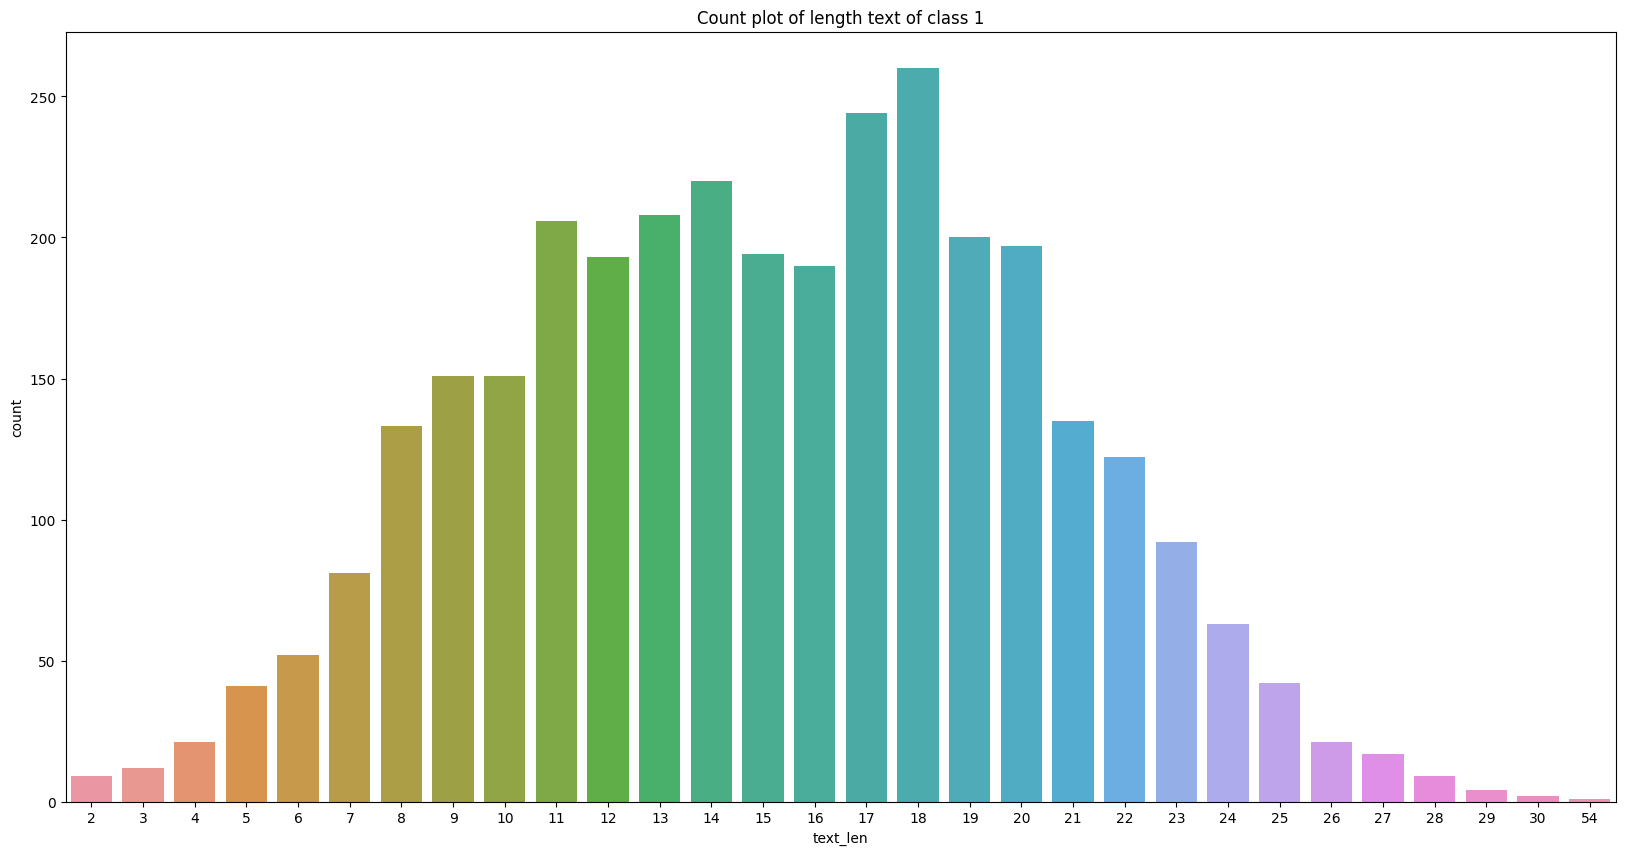

In [ ]:
plot_length_count(pos_df, 1)

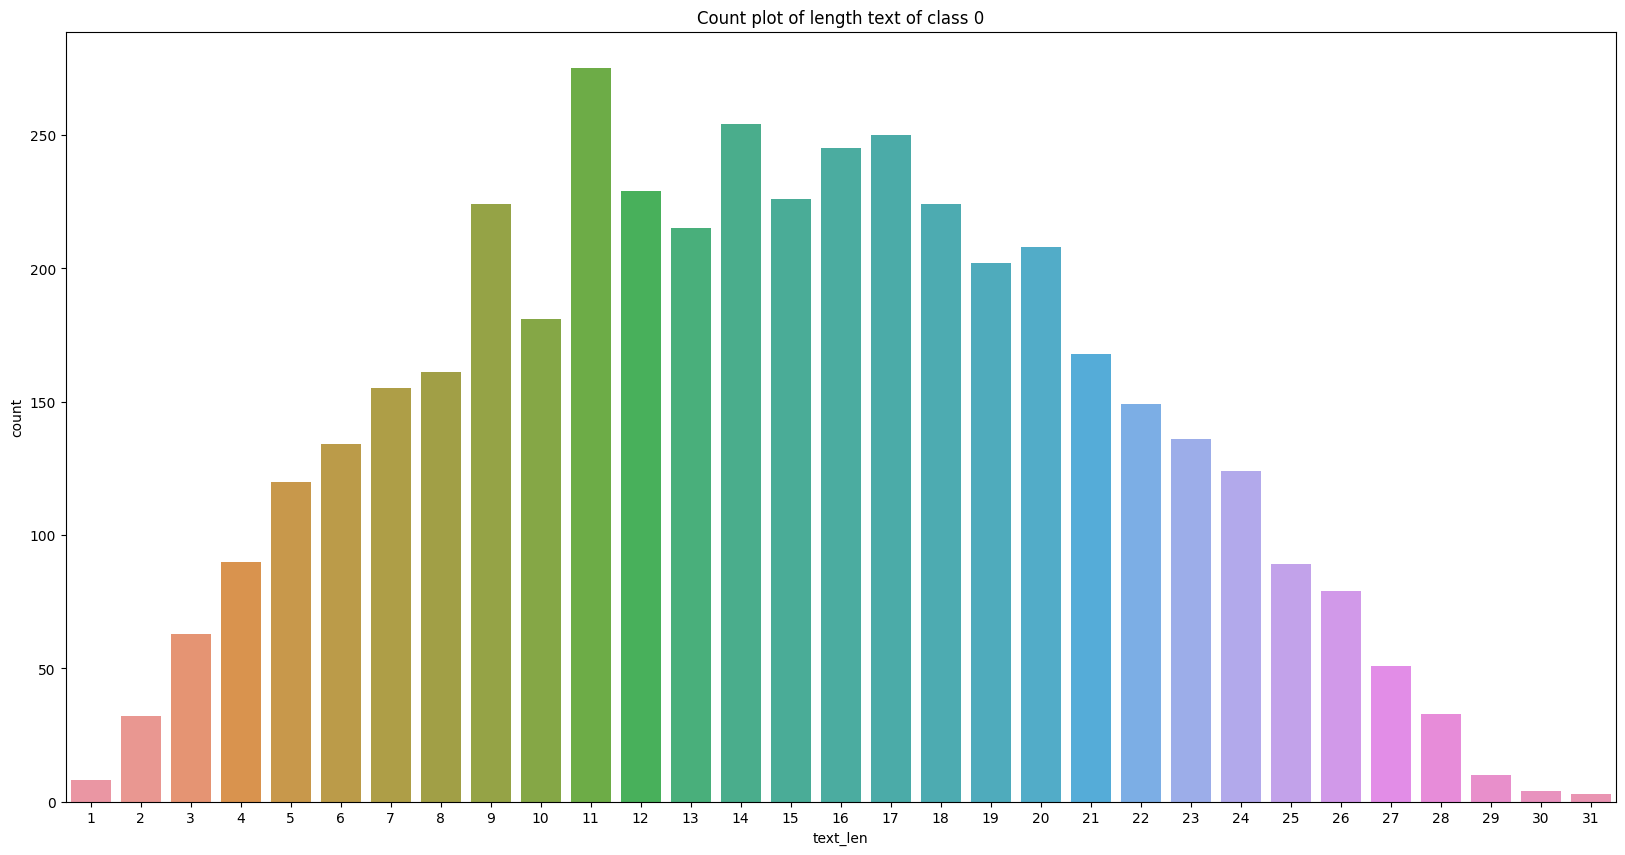

In [ ]:
plot_length_count(neg_df, 0)

### Average word length count

Text(0.5, 1.0, 'Not disaster')

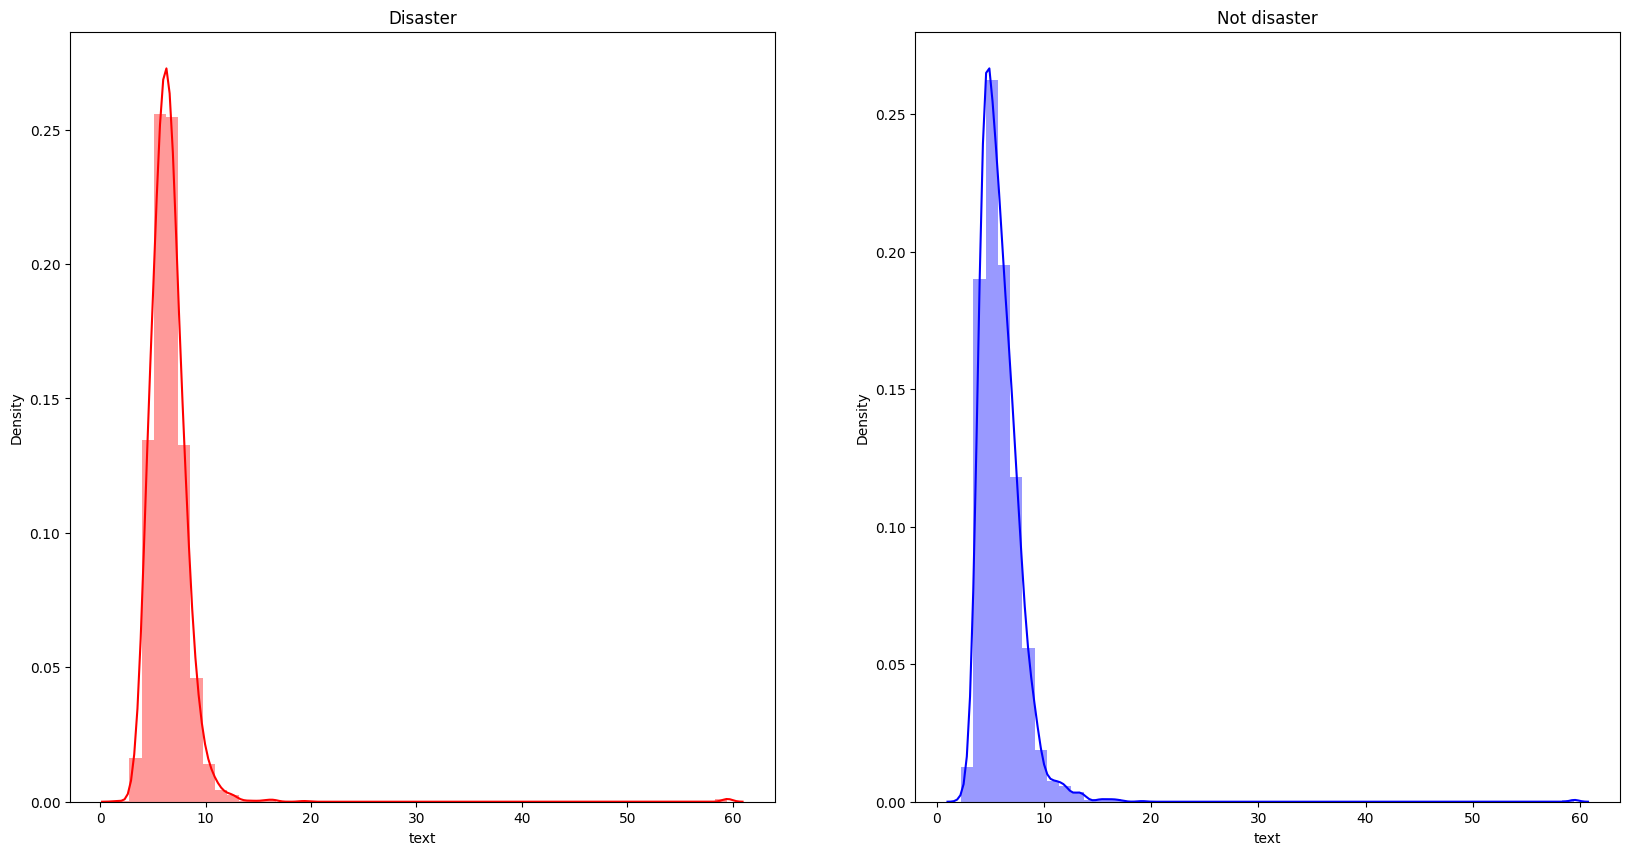

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
pos_word = pos_df["text"].str.split(" ").apply(lambda x: [len(i) for i in x])
neg_word = neg_df["text"].str.split(" ").apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Disaster')
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Not disaster')

### Stop word and puntuation

In [53]:
stop_words = list(stopwords.words("english"))
punctuation = list(string.punctuation)

In [ ]:
def plot_stop_punct(data, top, label):
    stop_word = []
    pun = []
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    for message in data["text"]:
        for word in message.split():
            if word in stop_words:
                stop_word.append(word)
            if word in punctuation:
                pun.append(word)
    stopword_fre = nltk.FreqDist(stop_word)
    stopword_top = stopword_fre.most_common(top)
    stopword_key, stopword_val = [item[0] for item in stopword_top], [item[1] for item in stopword_top]

    pun_fre = nltk.FreqDist(pun)
    pun_top = pun_fre.most_common(top)
    pun_key, pun_val  = [item[0] for item in pun_top], [item[1] for item in pun_top]

    plt.subplot(1,2,1)
    plt.bar(stopword_key, stopword_val, color = "red")
    ax1.set_title('Top {} stopword of class {} samples'.format(top, label))
    ax1.set_xlabel('Stop word ')
    ax1.set_ylabel("Frequency")

    plt.subplot(1,2,2)
    plt.bar(pun_key, pun_val, color = "blue")
    ax2.set_title('Top {} stopword of class {} samples'.format(top, label))
    ax2.set_xlabel('Stop word ')
    ax2.set_ylabel("Frequency")
    return


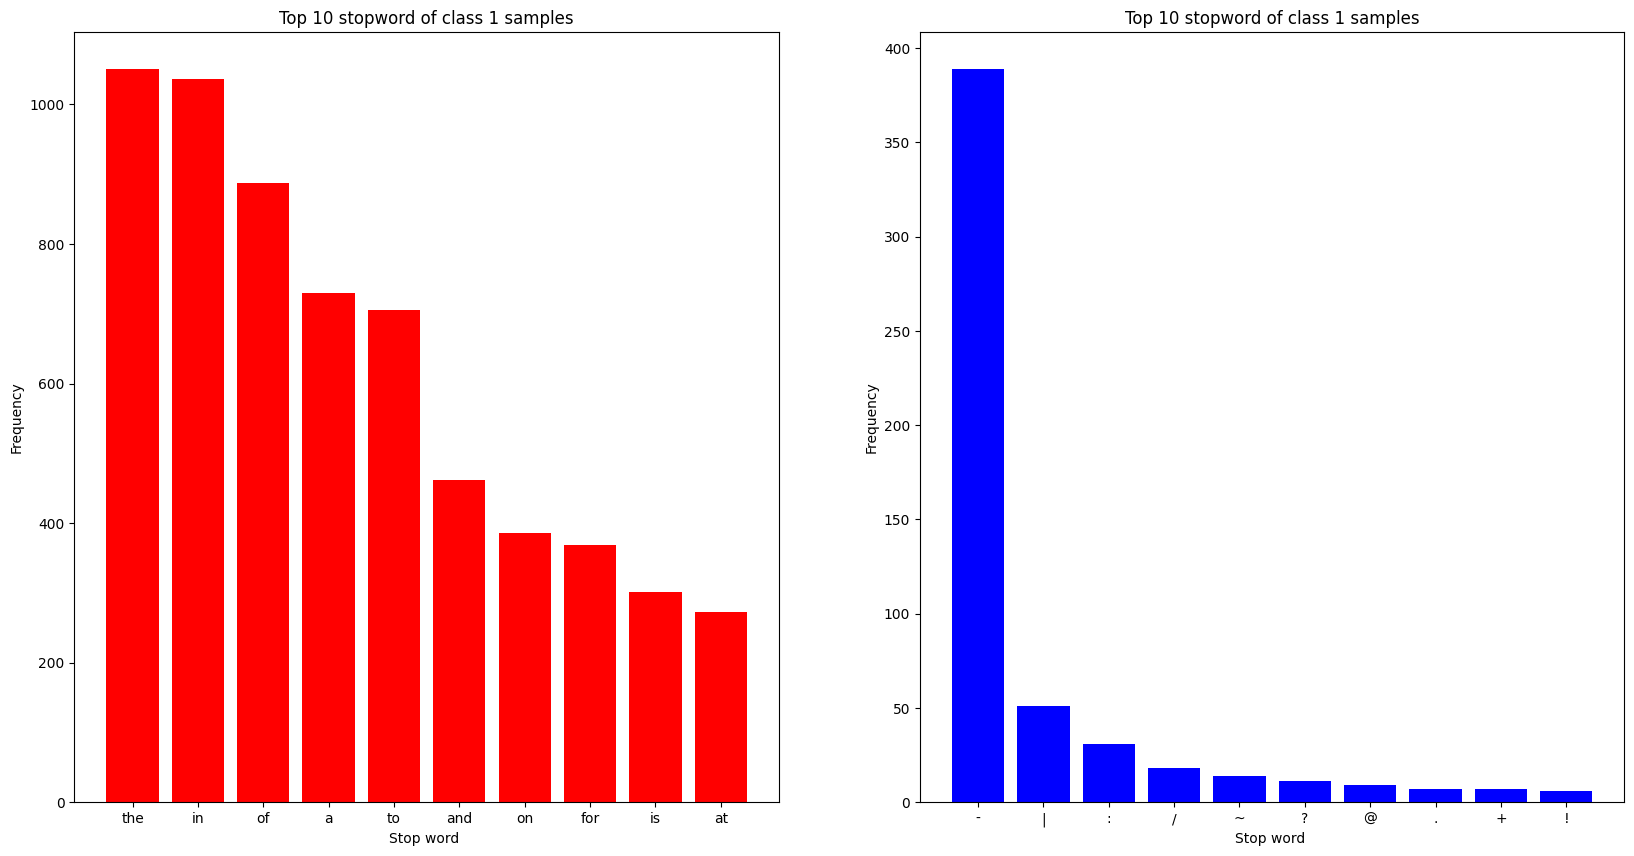

In [ ]:
plot_stop_punct(pos_df, 10, 1)

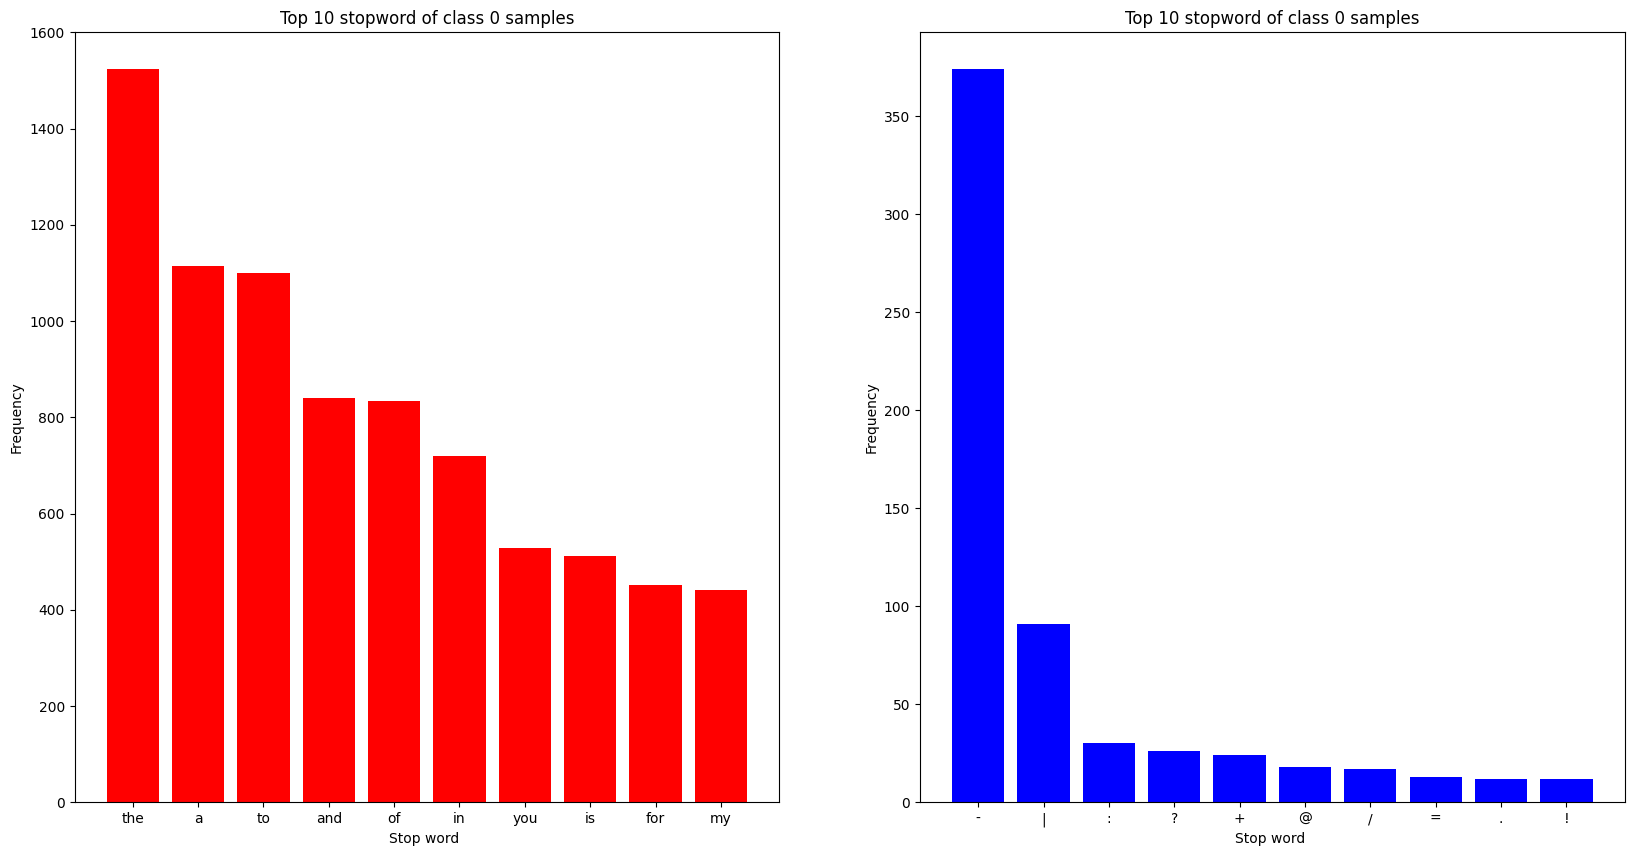

In [ ]:
plot_stop_punct(neg_df, 10, 0)


## Word Cloud

Get word cloud of class 1 and 0 samples before data processing.

In [89]:
def get_wordCloud(data, label, preprocessed = False, mask_img_dir = root_dir + "/images/mask.png"):
    mask_img = np.array(Image.open(mask_img_dir))
    wc = WordCloud(
    background_color='white',
    max_words=200,
    mask = mask_img)
    field = "text"
    if preprocessed == True:
        field = "cleaned"
    wc.generate(' '.join(text for text in data.loc[data['target'] == label, field]))
    plt.figure(figsize=(18,10))
    plt.title('Top words for class {} samples'.format(label),
              fontdict={'size': 22,  'verticalalignment': 'bottom'})
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    return

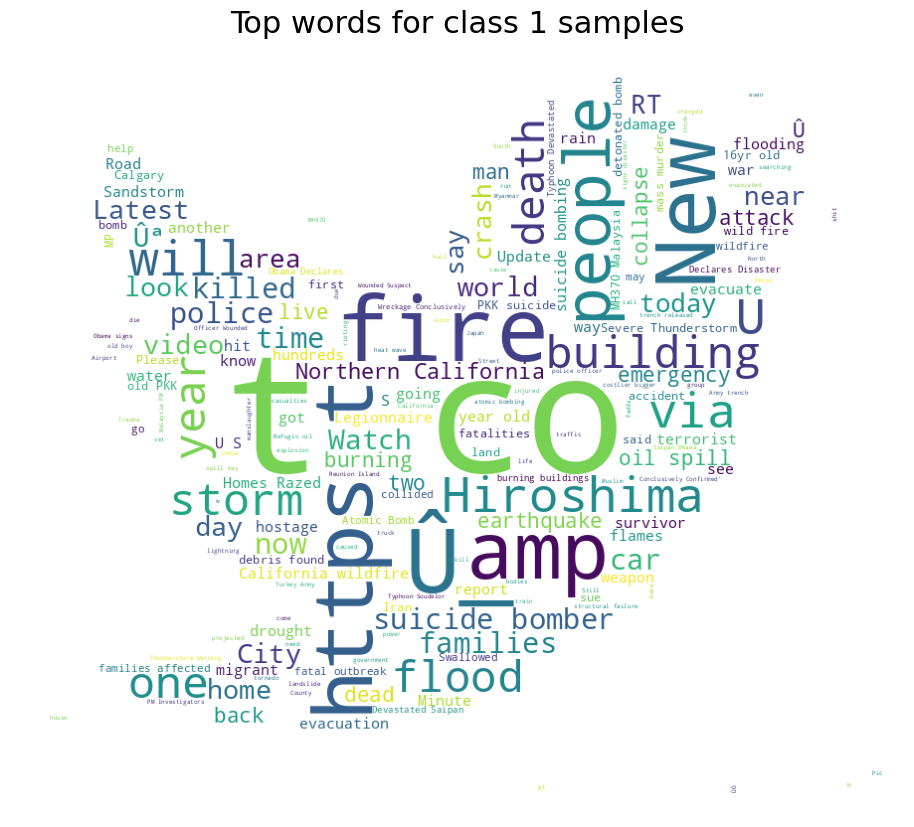

In [ ]:
get_wordCloud(pos_df, 1)

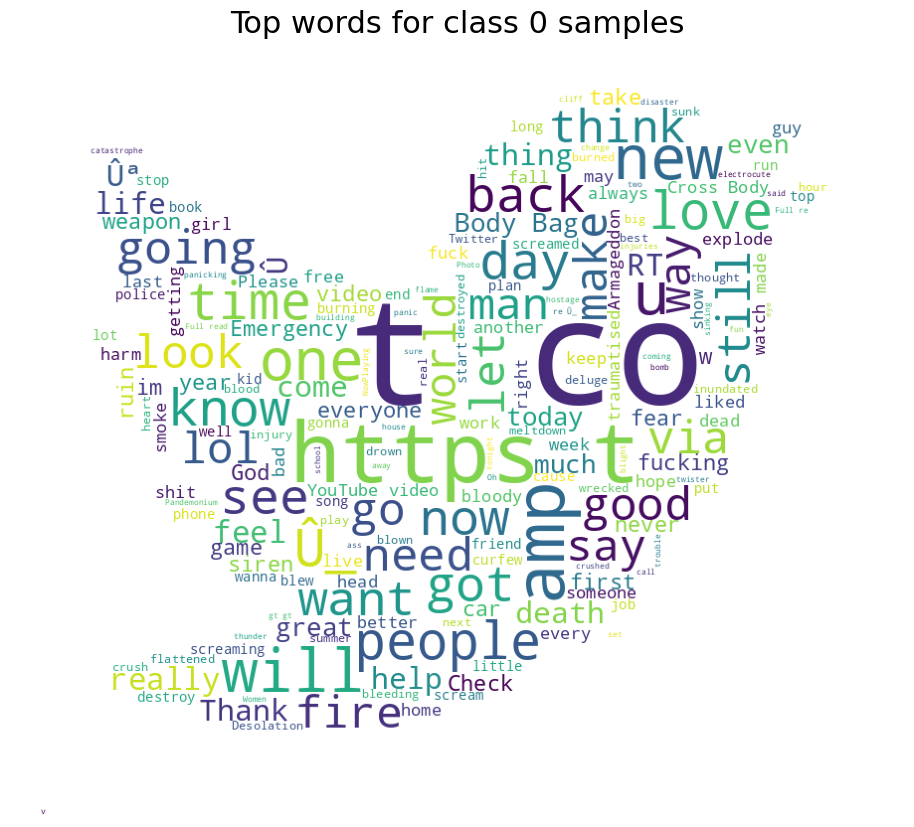

In [ ]:
get_wordCloud(neg_df, 0)

## **Data Preprocessing**

In [60]:
def lowercase(text):
    # Remove new line
    text = re.sub('\n', '', text)
    return " ".join([word.lower() for word in text.split(" ")])

def remove_stopwords(text):
    return " ".join(word for word in text.split(' ') if word not in stop_words)

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def remove_whitespace_and_extra_space(text):
    return  re.sub(r'\s+', ' ', text).strip()

def remove_url_html(text):
    # Remove url
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove html tag
    text = re.sub('<.*?>+', '', text)
    # Recheck
    text_list = []
    for word in text.split(" "):
        if (word.startswith("http") or word.startswith("https")):
            continue
        text_list.append(word)
    return " ".join(text_list)

def remove_numeric(text):
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_hastag(text):
    # Remove text that begins with "@"
    text = re.sub(r'@[^ ]*', '', text)
    # Remove all '#' characters
    text = re.sub('#', '', text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
#remove words less than 2 characters

def remove_less_than(text):
    return ' '.join([i for i in text.split() if len(i) > 2])


def stemming(text):
    stemmer = nltk.SnowballStemmer("english")
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

def remove_underscore(text):
    under_scores = ["_", "__", "___", "____", "_____"]
    for u in under_scores:
      text = re.sub(r"{}".format(u), " ", text)
    return re.sub(r'_', ' ', text)


In [20]:
ex = "eric_bulak jaclynsonn _oliviaann_    look guy live stream guess evacu cost front"
a = remove_underscore(ex)
print(a)
print(remove_whitespace_and_extra_space(a))

eric bulak jaclynsonn  oliviaann     look guy live stream guess evacu cost front
eric bulak jaclynsonn oliviaann look guy live stream guess evacu cost front


In [59]:
abbre= {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(abbre.keys()))
def expand_contractions(text, abbre = abbre):
    split_text = text.split(" ")
    text = [abbre[word] if word in abbre else word for word in split_text]
    return " ".join(text)



In [55]:
def clean(tweet):

    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)

    # Contractions
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"donå«t", "do not", tweet)

    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)

    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)



    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)


    return tweet

In [56]:
related_words_list = [
      "accident",
      "vocalno",
      "weapon",
      "thunderstorm",
      "chemical",
      "raccims",
      "windstorm",
      "death",
      "casualty",
      "fire",
      "violent",
      "fight",
      "nuclear",
      "biological",
      "collaps",
      "crash",
      "collid",
      "kill",
      "street",
      "devast",
      "typhoon",
      "bomb",
      "emerge",
      "power",
      "storm",
      "disaster",
      "hazard",
      "danger",
      "freedom",
      "murder",
      "smuggler",
      "snowstorm",
      "hurrica",
      "wildfire",
      "sandstorm",
      "catastrophic",
      "pandemic",
      "damage",
      "drought",
      "flood",
      "tsunami"
      "weather",
      "forest",
      "invade",
      "tragedy",
      "atomic",
      "famine",
      "disease",
      "pray",
      "break",
      "shoot",
      "death",
      "tornado",
      "world",
      "fatal",
      "survive"
  ]
def take_related_words(text):
    """
    Get words related to the topic from word in text
    ex: get "vocalno" from "volcanoåêinåêrussia aû_"
    """
    text_words = []
    for word in text.split(" "):
        is_changed = False
        for pattern in related_words_list:
            index = word.find(pattern)
            if index != -1:
                text_words.append(pattern)
                is_changed = True
        if not is_changed:
            text_words.append(word)
    return " ".join(text_words)

In [57]:
def text_preprocessing(text):
    text = lowercase(text)
    text = remove_underscore(text)
    text = remove_whitespace_and_extra_space(text)
    text = remove_url_html(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text = remove_numeric(text)
    text = remove_hastag(text)
    text = remove_emoji(text)
    text = remove_less_than(text)
    text = clean(text)
    text = take_related_words(text)
    text = expand_contractions(text, abbre = abbre)
    text = stemming(text)
    return text

### Apply preprocessing on train and test data

In [61]:
data['cleaned'] = data['text'].apply(lambda x: text_preprocessing(x))
data

,id,keyword,location,text,target,text_len,cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,deed reason earthquak may allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,peopl receiv fire wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,got sent photo rubi alaska smoke fire wildfir ...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,two giant crane hold bridg collap nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,aria ahrari thetawniest control wild fire cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,polic investig ebik collid car littl portug eb...


In [62]:
data_test["cleaned"] = data_test['text'].apply(lambda x: text_preprocessing(x))
data_test.head()

,id,keyword,location,text,cleaned
0,0,NaN,NaN,Just happened a terrible car crash,happen terribl car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan fire wildfir
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


### Remove length-0 sample after preprocessing

In [72]:
data['text_len_cleaned'] = data["cleaned"].apply(lambda x: len(x.split(" ")))
data

,id,keyword,location,text,target,text_len,cleaned,text_len_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,deed reason earthquak may allah forgiv,6
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,forest fire near rong sask canada,6
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,resid ask shelter place notifi offic evacu she...,11
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,peopl receiv fire wildfir evacu order california,7
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,got sent photo rubi alaska smoke fire wildfir ...,10
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,two giant crane hold bridg collap nearbi home,8
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,aria ahrari thetawniest control wild fire cali...,12
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,volcano hawaii,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,polic investig ebik collid car littl portug eb...,14


In [86]:
data[data['text_len_cleaned'] == 0] # None sample


,id,keyword,location,text,target,text_len,cleaned,text_len_cleaned


### Save preprocessed data

In [87]:
data.to_csv(data_dir + "/train_processed.csv")
data_test.to_csv(data_dir + "/test_processed.csv")

### Get word cloud of class 1 and class 0 samples after preprocessing.

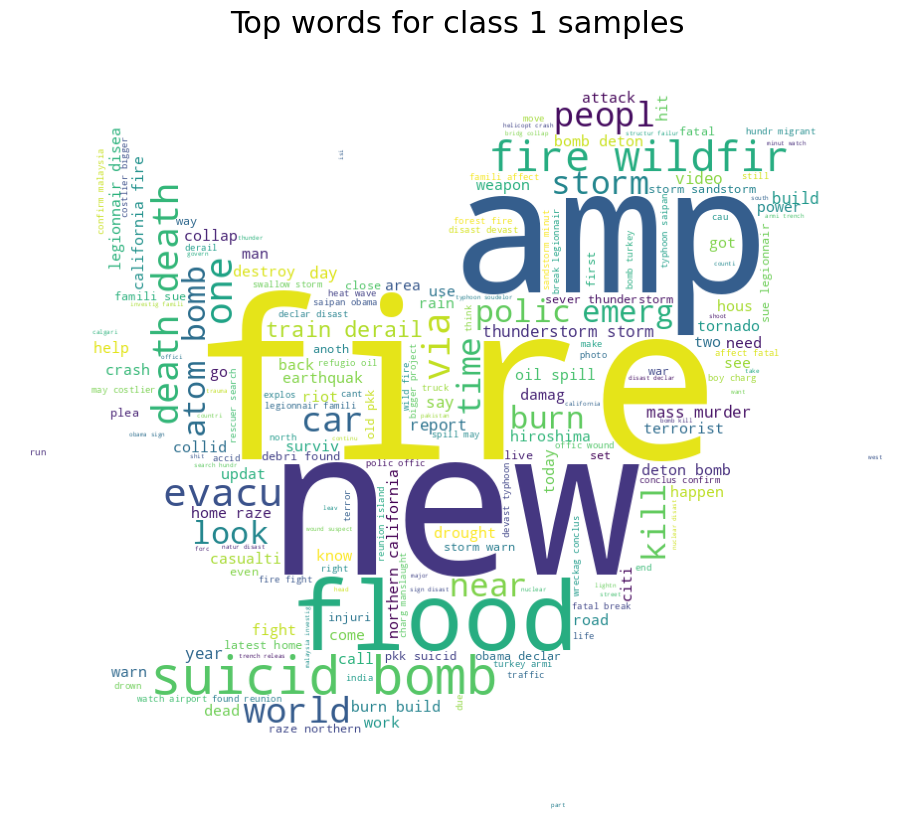

In [90]:
# Word cloud of "disaster" samples
get_wordCloud(data[data['target'] == 1], 1, preprocessed = True)

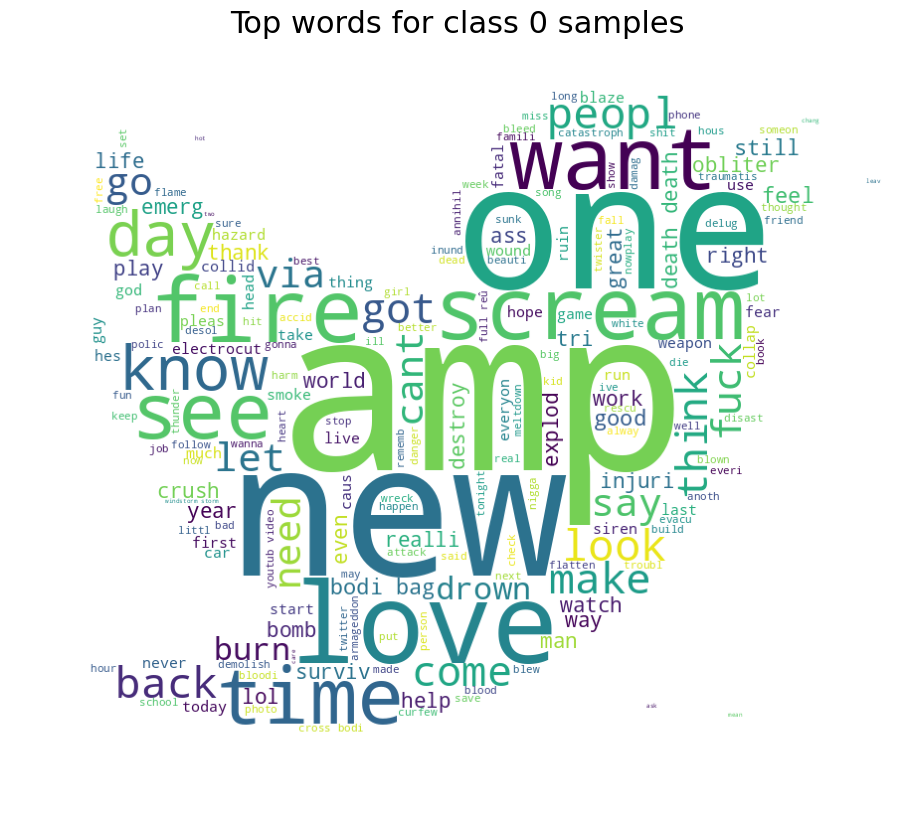

In [91]:
# Word cloud of "not disaster" samples
get_wordCloud(data[data['target'] == 0], 0, preprocessed = True)

### **Modeling**

In [92]:
X = data['cleaned']
y = data['target']

In [93]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

5709 5709
1904 1904


In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [95]:
y_test = encoder.fit_transform(y_test)
y_test

array([1, 0, 1, ..., 1, 0, 1])

#### **ML approach**

In [96]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [97]:
scorpus = X_train.to_list()
print(len(scorpus))

5709


In [98]:
def get_classfication_report(y_pred, y_true):
    return classification_report(y_true, y_pred)

In [99]:
def get_cfm(y_pred, y_true):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

##### **Naive Bayes**

In [137]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB(alpha = 1))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB(alpha=1))])

In [138]:
y_pred_class = pipe.predict(X_test)

In [139]:
print(y_test)

[1 0 1 ... 1 0 1]


In [140]:
print(y_pred_class)

[0 0 0 ... 1 0 1]


In [141]:
print("Accuracy on test set: ", (y_test == y_pred_class).sum()/len(y_pred_class))

Accuracy on test set:  0.7983193277310925


In [105]:
print(get_classfication_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      1091
           1       0.82      0.68      0.74       813

    accuracy                           0.80      1904
   macro avg       0.80      0.78      0.79      1904
weighted avg       0.80      0.80      0.80      1904



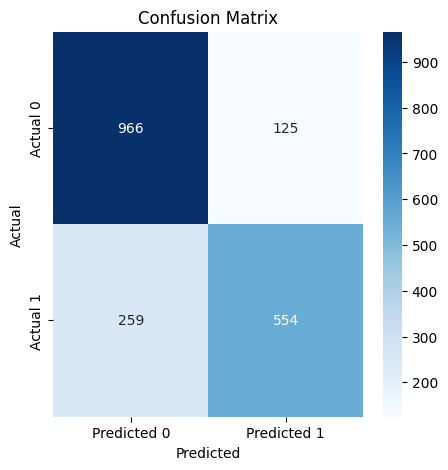

In [106]:
get_cfm(y_pred_class, y_test)

##### **XGBoost**

In [107]:
from xgboost import XGBClassifier

In [108]:
import xgboost as xgb

xgb_pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.5,
        max_depth=7,
        n_estimators=60,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=60,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [109]:
xgb_pred = xgb_pipe.predict(X_test)

In [110]:
print("Accuracy on test set: ", (y_test == xgb_pred).sum()/len(xgb_pred))

Accuracy on test set:  0.7752100840336135


In [111]:
print(get_classfication_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81      1091
           1       0.78      0.67      0.72       813

    accuracy                           0.78      1904
   macro avg       0.78      0.76      0.77      1904
weighted avg       0.78      0.78      0.77      1904



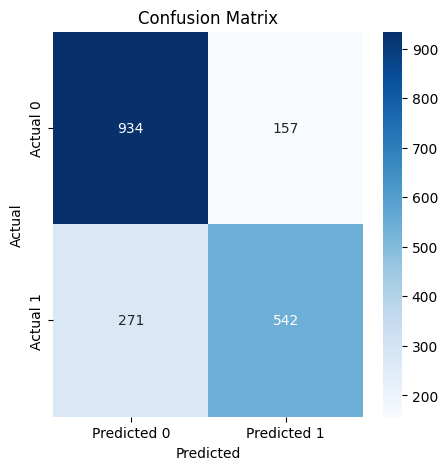

In [112]:
get_cfm(xgb_pred, y_test)

#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_pipe = Pipeline([('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', DecisionTreeClassifier())])
# Train Decision Tree Classifer
tree_pipe = tree_pipe.fit(X_train,y_train)

#Predict the response for test dataset
tree_pred = tree_pipe.predict(X_test)

In [ ]:
print("Accuracy on test set: ", (y_test == tree_pred).sum()/len(tree_pred))

Accuracy on test set:  0.7379201680672269


#### **Logistic Regression**

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lgt = Pipeline([('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', LogisticRegression())])

lgt.fit(X_train,y_train)

#Predict the response for test dataset
lgt_pred = lgt.predict(X_test)

In [121]:
print("Accuracy on test set: ", (y_test == lgt_pred).sum()/len(lgt_pred))

Accuracy on test set:  0.8025210084033614


##### **SVM**

In [113]:
from sklearn.svm import SVC

In [114]:
svm = Pipeline([('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', SVC())
])

svm.fit(X_train,y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

In [115]:
print("Accuracy on test set: ", (y_test == svm_pred).sum()/len(svm_pred))

Accuracy on test set:  0.8040966386554622


##### **Ensemble**

In [147]:
from sklearn.ensemble import VotingClassifier

model1 = MultinomialNB(alpha = 1)
model2 = xgb.XGBClassifier(
        learning_rate=0.5,
        max_depth=7,
        n_estimators=60,
        use_label_encoder=False,
        eval_metric='auc',
    )
model3 = LogisticRegression()
model4 = SVC()
ensemble_pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('classifier', VotingClassifier(
        estimators=[('bayes', model1), ('xgb', model2), ('lgt', model3), ('svm', model4)],
        voting='hard',
        weights = [1.5, 1, 3, 3.5]
))])

ensemble_pipe.fit(X_train, y_train)


Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('classifier',
                 VotingClassifier(estimators=[('bayes', MultinomialNB(alpha=1)),
                                              ('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric='auc',
                                                             fe...
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=7,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=60,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...)),
                                              ('lgt', LogisticRegression()),
                                              ('svm', SVC())],
                                  weights=[1.5, 1, 3, 3.5]))])

In [148]:
ens_pred = ensemble_pipe.predict(X_test)

In [149]:
print("Accuracy on test set: ", (y_test == ens_pred).sum()/len(ens_pred))

Accuracy on test set:  0.8067226890756303


In [150]:
print(get_classfication_report(ens_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1091
           1       0.84      0.67      0.75       813

    accuracy                           0.81      1904
   macro avg       0.82      0.79      0.80      1904
weighted avg       0.81      0.81      0.80      1904



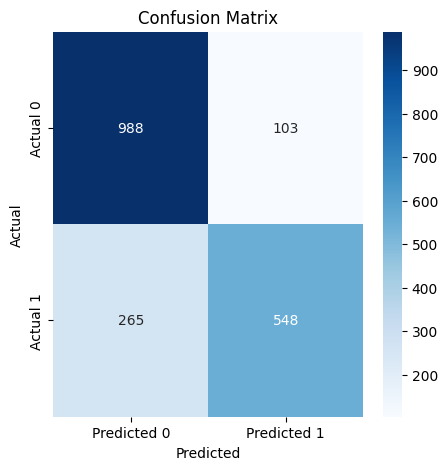

In [151]:
get_cfm(ens_pred, y_test)